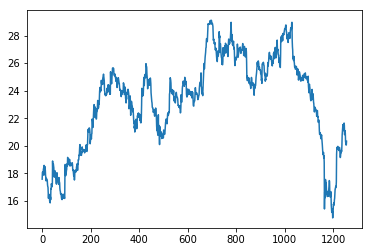

In [3]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import math
from keras.models import Sequential , load_model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,mean_squared_error

dataset = pandas.read_csv('carriage_services.csv', usecols=[0,2], engine='python', skipfooter=3)

plt.plot(dataset['High'])
plt.show()

`create_datasets()` is utility function that splits 80 % of the original dataset into training and 20 % into test sets

In [8]:
def create_datasets(dates,prices):
    train_size=int(0.80*len(dates))
    TrainX,TrainY=[],[]
    TestX,TestY=[],[]
    TrainX,TestX = dates[0:train_size] , dates[train_size:]
    TrainY,TestY = prices[0:train_size] , prices[train_size:]
            
    return TrainX,TrainY,TestX,TestY

dates,prices = [],[]
for data in dataset.values:
    dates.append(int(data[0].split('-')[2]))
    prices.append(float(data[1]))
    #prices.append([float(data[1]),float(data[2]),float(data[3])])

#print( prices )

TrainX,TrainY,TestX,TestY=create_datasets(dates,prices)
#Multi-Layer-Perceptron
model = Sequential()
model.add(Dense(8,input_dim=1,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1))
adam = Adam(lr=0.01)
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(TrainX,TrainY,epochs=150,batch_size=2,verbose=2)

#Evaluate 
PredY = model.predict(TestX)

print('MSE_ => ',mean_squared_error(TestY,PredY))

Epoch 1/150
 - 3s - loss: 155.6574
Epoch 2/150
 - 1s - loss: 113.2692
Epoch 3/150
 - 1s - loss: 96.9250
Epoch 4/150
 - 1s - loss: 80.4765
Epoch 5/150
 - 1s - loss: 61.9251
Epoch 6/150
 - 1s - loss: 44.5175
Epoch 7/150
 - 1s - loss: 30.3380
Epoch 8/150
 - 1s - loss: 20.1126
Epoch 9/150
 - 1s - loss: 14.3329
Epoch 10/150
 - 1s - loss: 11.8602
Epoch 11/150
 - 1s - loss: 10.9872
Epoch 12/150
 - 1s - loss: 10.7296
Epoch 13/150
 - 1s - loss: 10.7112
Epoch 14/150
 - 1s - loss: 10.7449
Epoch 15/150
 - 1s - loss: 10.7463
Epoch 16/150
 - 1s - loss: 10.5800
Epoch 17/150
 - 1s - loss: 10.5600
Epoch 18/150
 - 1s - loss: 10.5965
Epoch 19/150
 - 1s - loss: 10.7400
Epoch 20/150
 - 1s - loss: 10.5667
Epoch 21/150
 - 1s - loss: 10.5629
Epoch 22/150
 - 1s - loss: 10.6384
Epoch 23/150
 - 1s - loss: 10.5569
Epoch 24/150
 - 1s - loss: 10.7271
Epoch 25/150
 - 1s - loss: 10.5676
Epoch 26/150
 - 1s - loss: 10.5001
Epoch 27/150
 - 1s - loss: 10.6174
Epoch 28/150
 - 1s - loss: 10.6703
Epoch 29/150
 - 1s - loss: 